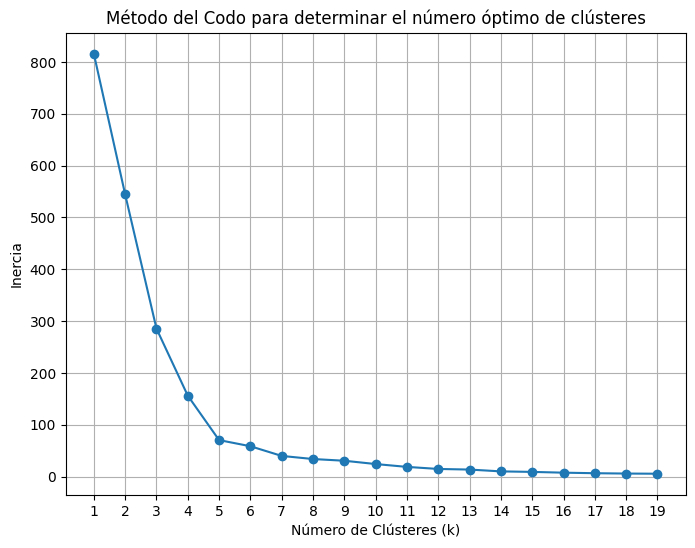

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Paso 1: Cargar el archivo CSV con los datos
data = pd.read_csv('kmeans_input_data.csv')
df = pd.DataFrame(data)

# Paso 2: Seleccionar las columnas relevantes (sin la columna ADPFlux)
X = df[['BiomassFluxImpact', 'MinFlux', 'MaxFlux']]

# Paso 3: Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: Calcular la inercia para diferentes valores de k (1 a 10)
inertia = []
k_range = range(1, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Paso 5: Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo para determinar el número óptimo de clústeres")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia")
plt.xticks(k_range)
plt.grid(True)
plt.show()


# Paso 4: Aplicar K-Means con el número de clústeres adecuado (por ejemplo, 3)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# Crear el gráfico 3D con puntos más pequeños
fig = px.scatter_3d(df, x='MinFlux', y='MaxFlux', z='BiomassFluxImpact', color='Cluster',
                    title="Clustering 3D de reacciones usando K-Means",
                    labels={'MinFlux': 'MinFlux', 'MaxFlux': 'MaxFlux', 'BiomassFluxImpact': 'BiomassFluxImpact'},
                    hover_data={'ReactionName': True})

# Ajustar el tamaño de los puntos (hacerlos más pequeños)
fig.update_traces(marker=dict(size=5))  # Cambia el valor de 'size' para hacer los puntos más pequeños

# Mostrar el gráfico
fig.show()


